In [1]:
#Install Packages I need
install.packages('TeachingDemos')
install.packages('png')

library('TeachingDemos')
library('tidyverse')
library('RCurl')
library('png')
library('TeachingDemos')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete




In [5]:
setRepositories(ind=1:2)
devtools::install_github("ropensci/magick")
devtools::install_github("GuangchuangYu/ggimage")


✔  checking for file ‘/tmp/RtmpQLYW1m/remotes7b57ce2b224/ropensci-magick-83d45b0/DESCRIPTION’ (539ms)
─  preparing ‘magick’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  running ‘cleanup’
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘magick_2.5.0.9000.tar.gz’
   


ERROR: Error: Failed to install 'magick' from GitHub:
  (converted from warning) installation of package ‘/tmp/RtmpQLYW1m/file7b59e8a752/magick_2.5.0.9000.tar.gz’ had non-zero exit status


In [ ]:
library("magick")
library("ggimage")

# Marble Datasets

The group Marbula One Stats (Twitter handle @MarbulaStats) has all the information on the Marbula One races, marbles, and teams. They recorded and calculate several variables. Note CTP stands for Comprehensive Team Performance rating and CIP stands for Comprehensive Individual Performance Rating:

| Variable name |        Meaning                           |
|---------------|-------------------------------------------|
|  CIP_In-Race  |measures a marble's average performance during a race (finish position, positions gained/lost)      |
|CTP_In-Race    | measures a teams average performance      |
|CIP_weekend    |measures a marble's performance over the whole weekend (start position to finish position)           |
|CTP_weekend    |measures a teams's performance over the whole weekend                                               |
|CIP_Consistency|measures how consistently a marble performs|
|CTP_Consistency|measures how consistently a team performs  |
|PWR_Last       | Previous power ranking                    |
|PWR_Now        | Current power ranking                     |
|Av_Str_pos     | Average Starting Position                 |
|Av_fin_pos     | Average Finishing Position                |
|Str_Val        | Starting Position Value                   |
|Fin_Val        | Finishing Position Value                  |

The remainder of the variables are the qualifier position, final position, points scored, and lap times for each of the 8 rounds.

I used their google spreadsheet to investigate some questions I had about marble racing. 

- What scores a team more points- consistency or speed?
- Is the qualifier position a good indication of a marbles finishing position?
- Who is a distance roller and who is the top sprinting marbles?
- 

In [7]:
marbles<- read_csv('https://github.com/jcaldous/Bios512/raw/main/B%20512/Final%20project%20draft/Marbula%20One%20Statsheets%20.csv',
                  col_types = cols(
  .default = col_double(),
  Marble = col_character(),
  Team = col_character(),
  Rnk = col_character()
))
marbles%>%head

Marble,Team,Pts,Rnk,CIP_In_Race,CIP_Weekend,CIP_Consistency,CIP_Combined,PWR_Last,PWR_Now,⋯,R6_Fin,R6_Times,R6_Pts,R7_Qual,R7_Fin,R7_Times,R7_Pts,R8_Qual,R8_Fin,R8_Pts
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anarchy,Balls of Chaos,11,26,262,255,-2.4,224,29,28,⋯,15,19.59,0,15,5,29.03,10,NA,NA,NA
Clutter,Balls of Chaos,35,T9,486,540,6.7,477,11,11,⋯,NA,NA,NA,NA,NA,NA,NA,3,5,10
Billy,Green Ducks,28,14,397,472,3.6,403,18,17,⋯,9,19.28,2,7,11,29.80,0,NA,NA,NA
Mallard,Green Ducks,36,8,563,614,17.4,567,5,5,⋯,NA,NA,NA,NA,NA,NA,NA,4,2,18
Smoggy,Hazers,57,3,604,846,25.4,728,2,2,⋯,8,19.16,4,2,1,28.72,25,NA,NA,NA
Hazy,Hazers,37,7,562,595,9.4,539,7,7,⋯,NA,NA,NA,NA,NA,NA,NA,15,8,4


In [8]:
marbles.team<- read_csv('https://github.com/jcaldous/Bios512/raw/main/B%20512/Final%20project%20draft/Marbula%20One%20Statsheets%20-%20Team%20data.csv',
                       col_types=cols(
                              .default = col_double(),
                              Team = col_character(),
                              Rnk = col_character()
                       ))

marbles.team%>%head

Team,Pts,Rnk,CTP_In_Race,CTP_Weekend,CTP_Consistency,CTP_Combined,PWR_Last,PWR_Now,Av_Str_pos,⋯,R5_Pts,R6_Qual,R6_Fin,R6_Pts,R7_Qual,R7_Fin,R7_Pts,R8_Qual,R8_Fin,R8_Pts
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Savage Speeders,101,1,595,960,8.4,692,2,1,6.63,⋯,0,2,3,15,3,7,6,1,1,25
Hazers,94,2,583,950,9.3,687,1,2,5.75,⋯,0,5,8,4,2,1,25,15,8,4
O'Rangers,69,3,455,736,2.5,515,4,3,7.50,⋯,25,14,10,2,4,2,19,11,12,0
Green Ducks,64,T5,480,699,4.8,513,3,4,8.13,⋯,2,13,9,2,7,11,0,4,2,18
Snowballs,66,4,466,662,2.5,481,5,5,9.50,⋯,0,12,1,25,12,13,0,8,3,16
Team Galactic,64,T5,481,625,3.9,472,6,6,10.50,⋯,4,15,11,0,13,8,4,14,15,0


# What Scores a Team More Points: Consistency Vs Speed

I was curious about whether, in marble racing consistency or median time had a better correlation to points scored. To to so, I graphed CTP consistency scores against the teams' points total over the 8 rounds and the median team times for 7 of the 8 rounds against the total points. I fitted a best  line of best fit to both and printed the equation and r^2 values for both on the graphs.  

Note: There is were no lap times for Round 8.

In [9]:
gal <- readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Galactic.png'))
chaos <- readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Chaos.png'))
hazer <- readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Hazers.png'))
hornet <- readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Hornet.png'))
mellow <- readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Mellow.png'))
momo <- readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Momo.png'))
orangers <- readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Orangers.png'))
primary <- readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Primary.png'))
raspberry <- readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Raspberry.png'))
rojo <- readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Rojo.png'))
snow <- readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Snowball.png'))
speeders <- readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Speedy.png'))
whisps <- readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Whisps.png'))
bolts <- readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/bolts.png'))
ducks <- readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/ducks.png'))
host <-readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/host.png'))
limer<-readPNG(getURLContent('https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Limer.png'))

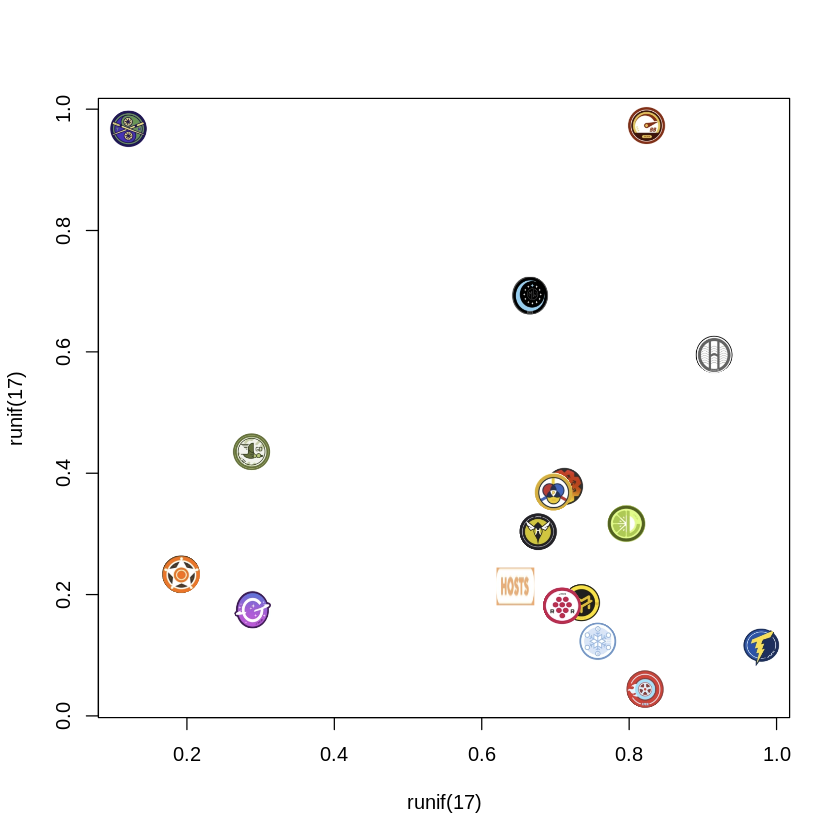

In [10]:
img1 <- gal

ms.rasterImage <- function(imgs, which=1, ...) {
  rasterImage(imgs[[which]], -1, -1, 1, 1)
}

logos2 <- list(as.raster(chaos),
               as.raster(ducks),
               as.raster(hazer), 
               as.raster(hornet),
               as.raster(host),
               as.raster(limer),
               as.raster(mellow),
               as.raster(whisps),
               as.raster(orangers),
               as.raster(raspberry),
               as.raster(rojo),
               as.raster(speeders),
               as.raster(snow),
               as.raster(gal),
               as.raster(momo),
               as.raster(primary),
               as.raster(bolts)
    )

my.symbols( runif(17), runif(17), ms.rasterImage, 
            MoreArgs=list(imgs=logos2), which=rep(1:17,2),
            inches=0.3, symb.plots=TRUE, add=FALSE)

In [12]:
gal <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Galactic.png'
chaos <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Chaos.png'
hazer <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Hazers.png'
hornet <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Hornet.png'
mellow <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Mellow.png'
momo <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Momo.png'
orangers <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Orangers.png'
primary <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Primary.png'
raspberry <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Raspberry.png'
rojo <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Rojo.png'
snow <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Snowball.png'
speeders <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Speedy.png'
whisps <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Whisps.png'
bolts <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/bolts.png'
ducks <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/ducks.png'
host <-'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/host.png'
limer<-'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Limer.png'
logos<- c(chaos,ducks,hazer,hornet,host,limer,mellow,whisps,
          orangers,raspberry,rojo,speeders,snow,gal,momo,primary,
          bolts)
mar.tm<-marbles.team%>%arrange(Team)
mar.tm$logo<- logos
mar.tm%>%head

Team,Pts,Rnk,CTP_In_Race,CTP_Weekend,CTP_Consistency,CTP_Combined,PWR_Last,PWR_Now,Av_Str_pos,⋯,R6_Qual,R6_Fin,R6_Pts,R7_Qual,R7_Fin,R7_Pts,R8_Qual,R8_Fin,R8_Pts,logo
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Balls of Chaos,46,9,319,504,-3.0,336,14,12,10.38,⋯,10,15,0,15,5,10,3,5,10,https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Chaos.png
Green Ducks,64,T5,480,699,4.8,513,3,4,8.13,⋯,13,9,2,7,11,0,4,2,18,https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/ducks.png
Hazers,94,2,583,950,9.3,687,1,2,5.75,⋯,5,8,4,2,1,25,15,8,4,https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Hazers.png
Hornets,8,16,156,261,-13.4,124,16,16,10.38,⋯,7,14,0,11,15,0,12,14,0,https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Hornet.png
Host Team,39,NA,414,448,0.9,352,NA,NA,11.63,⋯,8,2,18,14,9,2,7,11,0,https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/host.png
Limers,25,15,192,382,-8.0,217,15,15,9.50,⋯,9,16,0,6,14,0,16,16,0,https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Limer.png


In [ ]:
lm_eqn <- function(mar.tm){
  m <- lm(Pts ~ CTP_Consistency, mar.tm);
  eq <- substitute(italic(Pts) == a + b %.% italic(CTP_Consistency)*","~~italic(r)^2~"="~r2, 
                   list(a = format(unname(coef(m)[1]), digits = 2),
                        b = format(unname(coef(m)[2]), digits = 2),
                        r2 = format(summary(m)$r.squared, digits = 3)))
  as.character(as.expression(eq));
}

In [ ]:
options(repr.plot.width=7, repr.plot.height=5, repr.plot.res=300)
p=ggplot(mar.tm, aes(x=CTP_Consistency, y=Pts))
p=p+ geom_image(aes(image=logo), size=.05) + 
  geom_smooth(method=lm, size=0.5, color='black', se=FALSE) 
p=p+labs(title="Does Consistency pay off?", 
         subtitle="Comparing Marble teams consistency scores to their total points scored",
         x="Consistency Score",
         y="Total Points Over 8 Rounds"
)

In [13]:
marb<-marbles%>% group_by(Team)%>% select(Team,R1_time,R2_time,R3_times,R4_times,R5_Times,R6_Times,R7_Times)%>%summarise(mean.time=mean(c(R1_time,R2_time,R3_times,R4_times,R5_Times,R6_Times,R7_Times),na.rm = TRUE))
mar.time<-merge(marb,mar.tm,by="Team")
write.csv(mar.time, "martime.csv")

`summarise()` ungrouping output (override with `.groups` argument)



In [ ]:
p1=ggplot(mar.time, aes(x=mean.time, y=Pts))
p1=p1+ geom_image(aes(image=logo), size=.05) + 
  geom_smooth(method=lm, size=0.5, color='black', se=FALSE) 
p1=p1+labs(title="Is Speed King?", 
         subtitle="Comparing Marble teams mean speed to their total points scored",
         x="Mean Time over all 4 Rounds (s)",
         y="Total Points Over 8 Rounds"
)
p1=p1+geom_text(x = 28.25, y = 100, label = lm_eqn(mar.time), parse = TRUE)

p+p1

# Is the qualifier position a good indication of a marbles finishing position?

For me, the qualifier is the preview of the main race. However, how good is the qualifier at estimating the final results? Is the winning the qualifier mean a marble will win the race, or is there no relationship between the two races.

In order to measure this is transformed the data into a long format with the following columns: Marble, Team, Round, Qualifier Position(Qual), Points(Pts). I then calculated the expected points based on qualifier position(col= expected),  the difference between expected and actual points (col=difference), and whether the difference is positive or not (col= pos).

Using this transformed dataset, I created a boxplot distribution per round of the difference between the expexted minus the actual points scored by the marble.

In [39]:
mar1<-marbles%>%select(Marble,Team, R1_Qual,R1_Pts,R2_Pts, R3_Pts,R4_Pts,R5_Pts,R6_Pts,R7_Pts,R8_Pts, R2_Qual, R3_Qual,R4_Qual,R5_Qual,R6_Qual,R7_Qual,R8_Qual)
mar.long<-mar1%>%
    as_tibble %>%
    pivot_longer(cols = !c(Marble,Team))

mar.long$round<-substr(mar.long$name, 1, 2)
mar.long$col<-ifelse(substr(mar.long$name, 3, 4)=="_Q", mar.long$col<-"Qual", mar.long$col<-"Pts")
mar.long$name<-NULL

mar.wide = mar.long %>%
      as_tibble %>%
     pivot_wider(id_cols = c( Marble, Team, round), names_from = col, values_from = value)

mar.wide$expected<-ifelse(mar.wide$Qual== 1, mar.wide$expected<-25,
                     ifelse(mar.wide$Qual==2,mar.wide$expected<-18, 
                     ifelse(mar.wide$Qual==3,mar.wide$expected<-15,
                     ifelse(mar.wide$Qual==4,mar.wide$expected<-12,
                     ifelse(mar.wide$Qual==5,mar.wide$expected<-10,
                     ifelse(mar.wide$Qual==6,mar.wide$expected<-8,
                     ifelse(mar.wide$Qual==7,mar.wide$expected<-6,
                     ifelse(mar.wide$Qual==8,mar.wide$expected<-4,
                     ifelse(mar.wide$Qual %in% c(9,10),mar.wide$expected<-2,
                     ifelse(mar.wide$Qual %in% c(11,12,13,14,15,16) ,mar.wide$expected<-4,mar.wide$expected<-NA))))))))))
mar.wide<-mar.wide%>%group_by(round)%>%mutate(difference=(expected-Pts),pos=(difference>0))

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Removed 128 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 128 rows containing missing values (geom_point).”


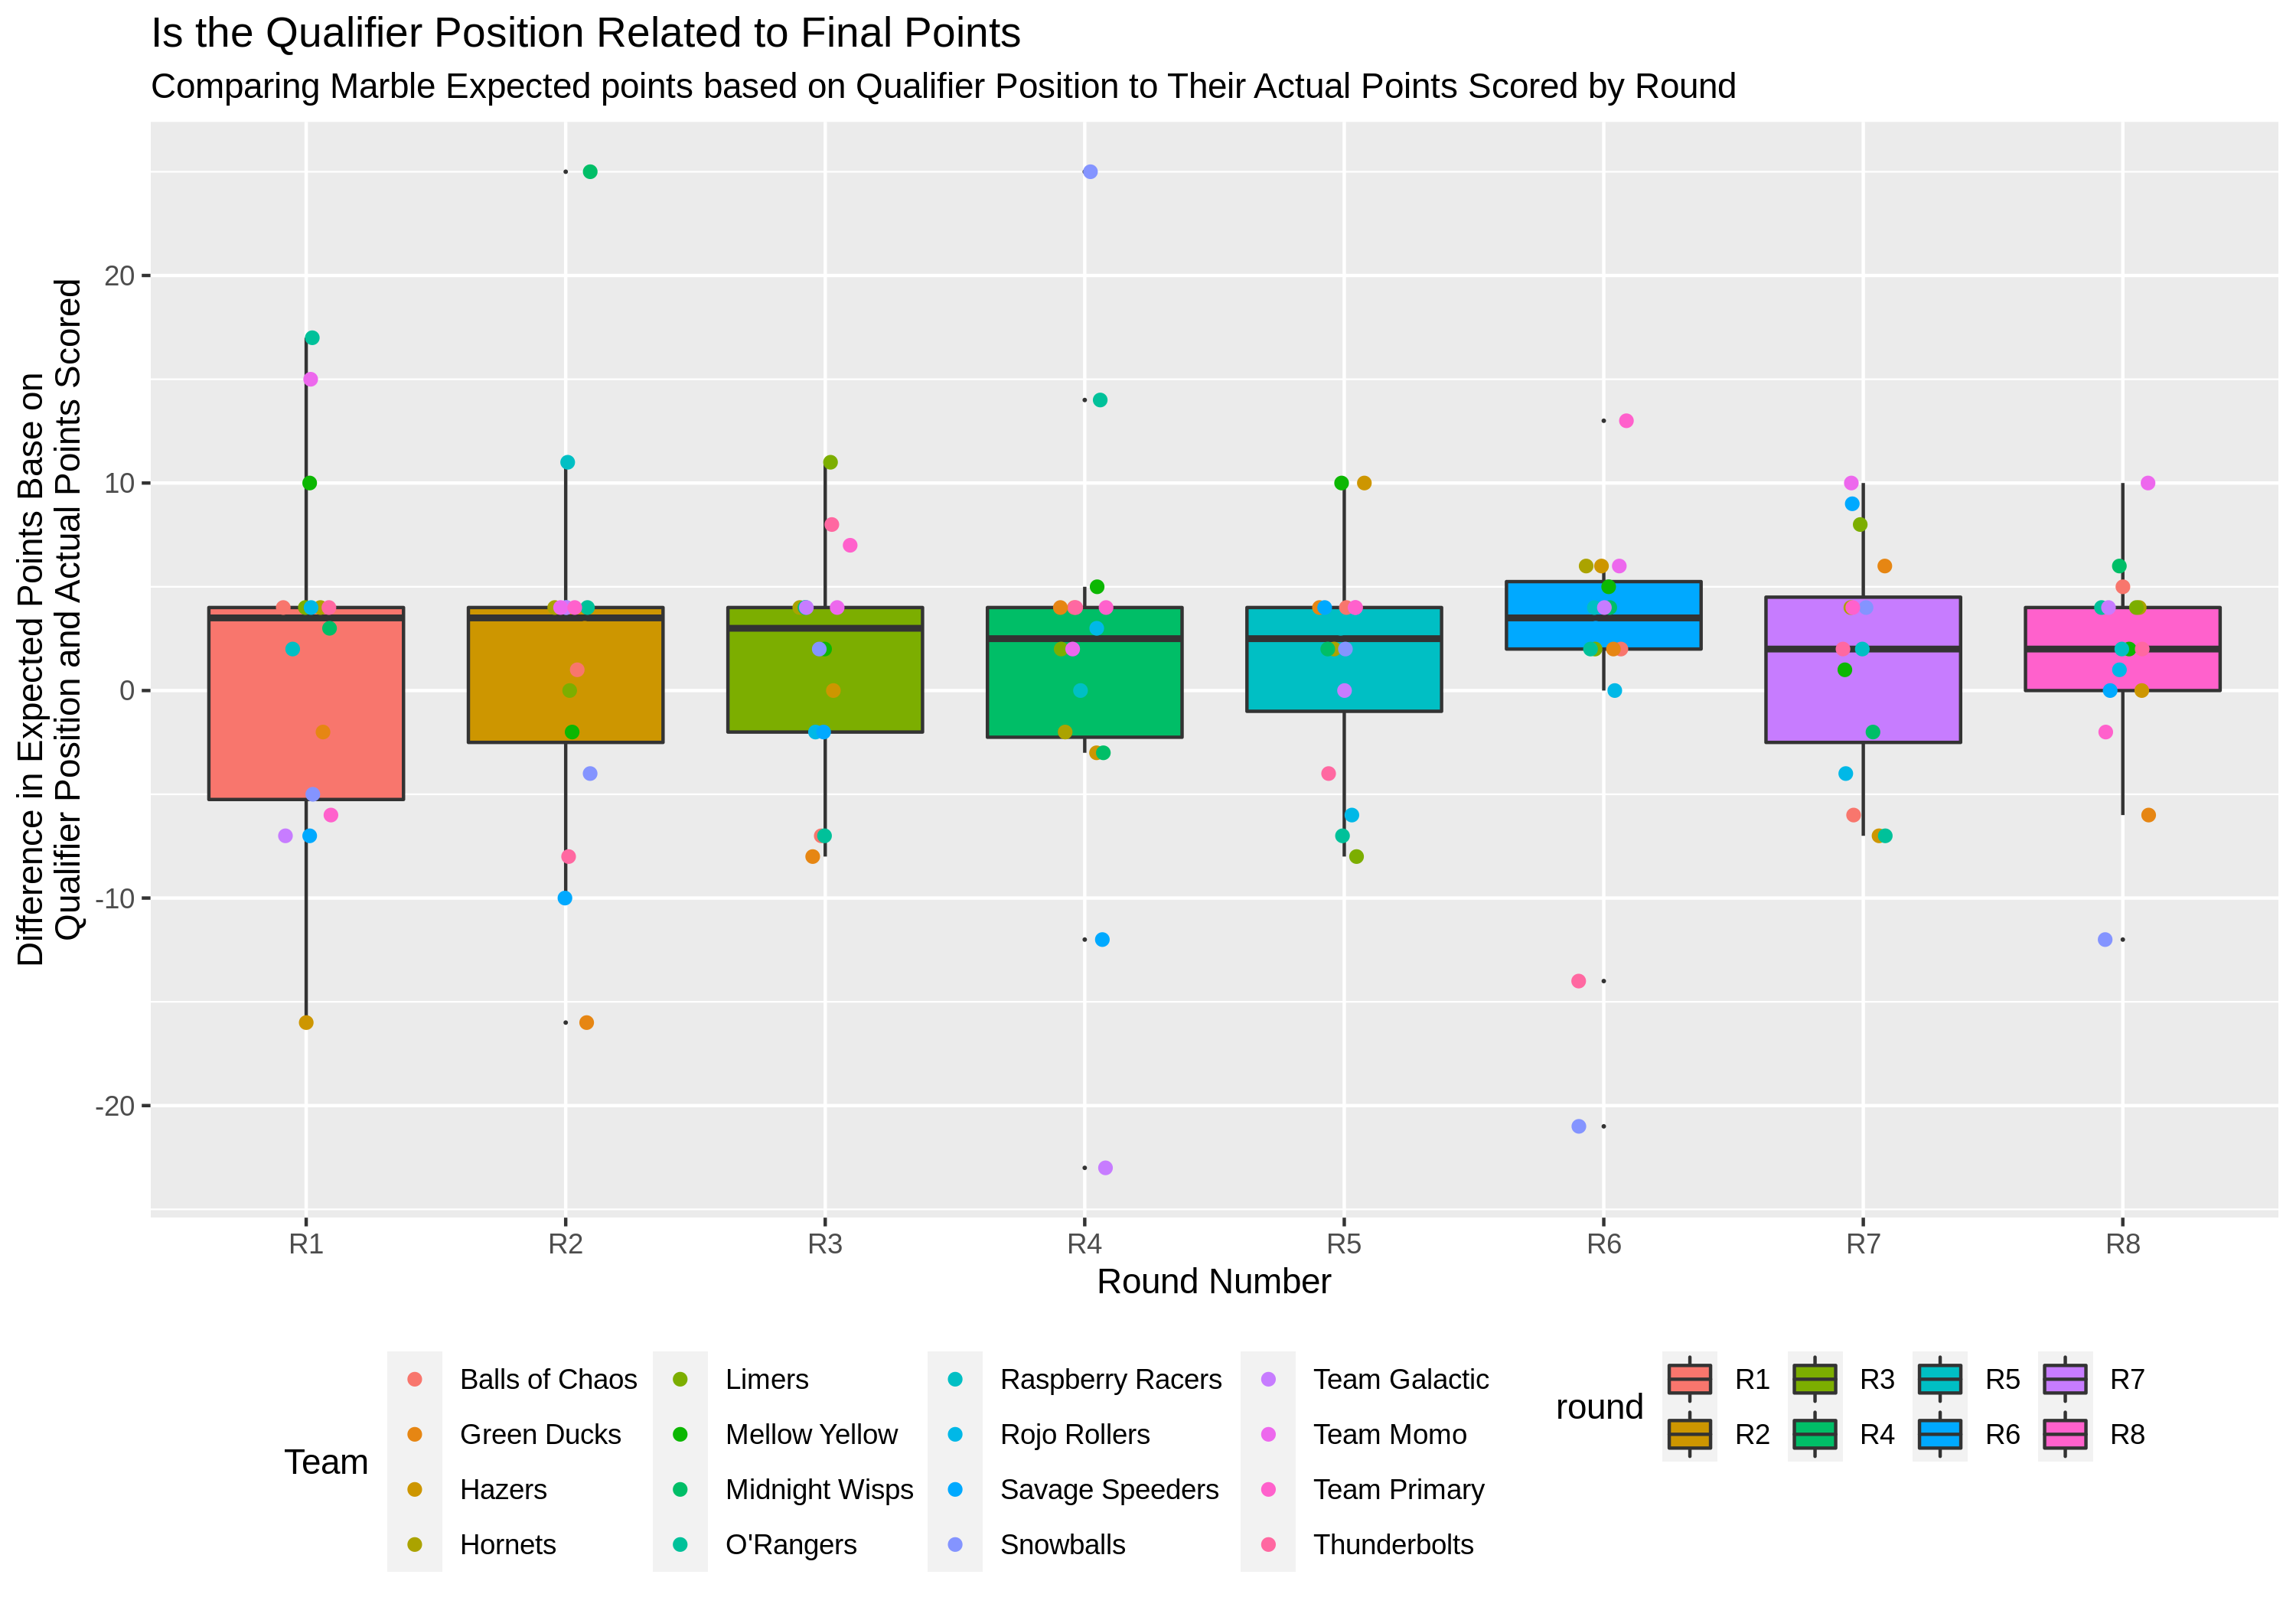

In [34]:
options(repr.plot.width=10, repr.plot.height=7, repr.plot.res=300)

mar.mediandif<-mar.wide%>%group_by(round)%>%summarize(difference=median(difference, na.rm=TRUE))

q1=ggplot(mar.wide, aes(x=round,y=difference))+geom_boxplot(aes(fill=round), outlier.size = 0)+
    geom_point(aes(color=Team),position=position_jitter(w=.1,h=0))
#                   mapping=aes(x=round, ymin=difference,ymax=difference),
#                   size=.25,
#                   color="black")
q1=q1+labs(title="Is the Qualifier Position Related to Final Points", 
         subtitle="Comparing Marble Expected points based on Qualifier Position to Their Actual Points Scored by Round",
         x="Round Number",
         y="Difference in Expected Points Base on
            Qualifier Position and Actual Points Scored"
)
q1+theme(legend.position="bottom")

# Who is a distance roller and who is the top sprinting marbles?

The Marbula 1 is a 8 race event. Since I have times for 7 of them, I wanted to know if certain marbles did better on longer courses vs shorter courses. 

Therefore, I looked at the distance of the 7 speedways. 
https://jellesmarbleruns.fandom.com/wiki/Savage_Speedway

- R1 Savage speedway: 12.81m, 13 turns
- R2 O'Raceway: 14.05m, 11 turns
- R3 Momotorway: 12.05m, 13 turns
- R4 Hivedrive: 13.20m, 11 turns
- R5 Greenstone: 14.55m, 23 turns
- R6 Short Circuit: 11.90m, 8 turns
- R7 Razzway: 14.38m, 15 turns

Then I calculated the mean track length which is 12.81. So I labeled tracks longer than the mean as distance, and shorter than the mean as sprints. I created "Short_Pts" and "Long_Pts" columns which recorded total points scored on short or long tracks. Using this information I charted bar charts for each marble faceted by team to compare where they scored more points, on sprints or distance courses. 

In [35]:
mean(12.81,14.05,12.05,13.20,14.55,11.90,14.38)

[1] 12.81

In [36]:
mar.wide%>%head

Marble,Team,round,Qual,Pts,expected,difference,pos
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Anarchy,Balls of Chaos,R1,NA,NA,NA,NA,NA
Anarchy,Balls of Chaos,R2,9,1,2,1,TRUE
Anarchy,Balls of Chaos,R3,NA,NA,NA,NA,NA
Anarchy,Balls of Chaos,R4,14,0,4,4,TRUE
Anarchy,Balls of Chaos,R5,NA,NA,NA,NA,NA
Anarchy,Balls of Chaos,R6,10,0,2,2,TRUE


In [54]:
mar.wide$Short_Pts<-ifelse(mar.wide$round %in% c("R1","R3","R6"),mar.wide$Short_Pts<-mar.wide$Pts, mar.wide$Short_Pts<-NA)
mar.wide$Long_Pts<-ifelse(mar.wide$round %in% c("R2","R4","R5","R7"),mar.wide$Long_Pts<-mar.wide$Pts,mar.wide$Long_Pts<-NA)
mar.wide%>%head(12)

Marble,Team,round,Qual,Pts,expected,difference,pos,Short_Pts,Long_Pts
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>
Anarchy,Balls of Chaos,R1,NA,NA,NA,NA,NA,NA,NA
Anarchy,Balls of Chaos,R2,9,1,2,1,TRUE,NA,1
Anarchy,Balls of Chaos,R3,NA,NA,NA,NA,NA,NA,NA
Anarchy,Balls of Chaos,R4,14,0,4,4,TRUE,NA,0
Anarchy,Balls of Chaos,R5,NA,NA,NA,NA,NA,NA,NA
Anarchy,Balls of Chaos,R6,10,0,2,2,TRUE,0,NA
Anarchy,Balls of Chaos,R7,15,10,4,-6,FALSE,NA,10
Anarchy,Balls of Chaos,R8,NA,NA,NA,NA,NA,NA,NA
Clutter,Balls of Chaos,R1,15,0,4,4,TRUE,0,NA


In [61]:
mar.distance<-mar.wide%>%
    group_by(Marble,Team)%>%
    summarize(Short_Pts=sum(Short_Pts,na.rm=NA),Long_Pts=sum(Long_Pts,na.rm=NA))

mar.distance<-mar.distance%>%
    as_tibble %>%
    pivot_longer(cols = !c(Marble,Team))
mar.distance%>%head


`summarise()` regrouping output by 'Marble' (override with `.groups` argument)



Marble,Team,name,value
<chr>,<chr>,<chr>,<dbl>
Anarchy,Balls of Chaos,Short_Pts,0
Anarchy,Balls of Chaos,Long_Pts,11
Billy,Green Ducks,Short_Pts,2
Billy,Green Ducks,Long_Pts,26
Bolt,Thunderbolts,Short_Pts,0
Bolt,Thunderbolts,Long_Pts,29


In [ ]:
install.packages("ggpubr")


In [ ]:
options(repr.plot.width=15, repr.plot.height=10, repr.plot.res=500)
dist=ggplot(mar.distance,aes(x = reorder(Marble, value), y = value, fill=name)) +
  geom_bar(stat = 'identity') +
  coord_flip() +
  facet_wrap(~Team, scales = 'free') +
  labs(x = NULL, 
       y = "Points")
dist
#+ background_image(logos2)

also installing the dependencies ‘matrixStats’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘foreign’, ‘openxlsx’, ‘boot’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


